In [3]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
from datetime import datetime

## for Deep-learing:
import keras
from keras.layers import Dense
from keras import optimizers
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


In [49]:
# df = pd.read_csv('dataset.csv', sep=';', 
#                  parse_dates={'dt' : ['lastSensorEventHours','lastSensorDayOfWeek']}, infer_datetime_format=True, 
#                  low_memory=False, na_values=['nan','?'], index_col='dt')
df = pd.read_csv('FImportance(ExtraTree).csv',low_memory=False, na_values=['nan','?'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447530 entries, 0 to 447529
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   lastSensorEventHours      447530 non-null  int64  
 1   lastSensorEventSeconds    447530 non-null  int64  
 2   lastSensorDayOfWeek       447530 non-null  int64  
 3   windowDuration            447530 non-null  int64  
 4   prevDominantSensor1       447530 non-null  int64  
 5   prevDominantSensor2       447530 non-null  int64  
 6   lastSensorID              447530 non-null  int64  
 7   lastSensorLocation        447530 non-null  int64  
 8   lastMotionLocation        447530 non-null  int64  
 9   complexity                447530 non-null  float64
 10  sensorCount-Bedroom       447530 non-null  float64
 11  sensorCount-Ignore        447530 non-null  float64
 12  sensorCount-Kitchen       447530 non-null  float64
 13  sensorCount-LivingRoom    447530 non-null  f

In [50]:
df.shape

(447530, 22)

In [51]:
# get a list of columns
cols = list(df)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('activity')))
cols

['activity',
 'lastSensorEventHours',
 'lastSensorEventSeconds',
 'lastSensorDayOfWeek',
 'windowDuration',
 'prevDominantSensor1',
 'prevDominantSensor2',
 'lastSensorID',
 'lastSensorLocation',
 'lastMotionLocation',
 'complexity',
 'sensorCount-Bedroom',
 'sensorCount-Ignore',
 'sensorCount-Kitchen',
 'sensorCount-LivingRoom',
 'sensorElTime-Bathroom',
 'sensorElTime-Bedroom',
 'sensorElTime-Chair',
 'sensorElTime-DiningRoom',
 'sensorElTime-Kitchen',
 'sensorElTime-OutsideDoor',
 'sensorElTime-WorkArea']

In [52]:
# # use ix to reorder
df = df.loc[:, cols]
df

,activity,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorCount-Ignore,sensorCount-Kitchen,sensorCount-LivingRoom,sensorElTime-Bathroom,sensorElTime-Bedroom,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Kitchen,sensorElTime-OutsideDoor,sensorElTime-WorkArea
0,Phone,11,42604,4,245,7,7,7,7,7,...,6.43,0.0,18.98,744.794231,593.410195,86400.0,259.601396,263.245869,223.686032,86400.0
1,Phone,11,42605,4,244,7,7,5,5,7,...,7.49,0.0,17.84,745.890751,594.506715,86400.0,260.697916,264.342389,224.782552,86400.0
2,Phone,11,42605,4,243,7,7,7,7,7,...,7.56,0.0,17.69,745.918953,594.534917,86400.0,260.726118,264.370591,224.810754,86400.0
3,Phone,11,42606,4,244,7,7,5,5,7,...,8.63,0.0,16.54,747.591698,596.207662,86400.0,262.398863,266.043336,226.483499,86400.0
4,Phone,11,42608,4,243,7,7,5,5,7,...,9.71,0.0,16.68,749.202396,597.818360,86400.0,264.009561,267.654034,228.094197,86400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447525,Phone,17,63373,2,523,5,8,8,8,8,...,16.20,0.0,0.00,539.820228,7004.333670,86400.0,7329.759859,7150.886243,549.996731,86400.0
447526,Phone,17,63373,2,521,5,8,5,5,8,...,16.04,0.0,0.00,539.825193,7004.338635,86400.0,7329.764824,7150.891208,550.001696,86400.0
447527,Phone,17,63375,2,519,5,8,8,8,8,...,16.18,0.0,0.00,541.696495,7006.209937,86400.0,7331.636126,7152.762510,551.872998,86400.0
447528,Phone,17,63376,2,520,5,8,8,8,8,...,16.32,0.0,0.00,542.256187,7006.769629,86400.0,7332.195818,7153.322202,552.432690,86400.0


In [53]:
df['activity'] = df['activity'].str.replace('Cook','0')
df['activity'] = df['activity'].str.replace('Eat','1')
df['activity'] = df['activity'].str.replace('Phone','2')
df['activity'] = df['activity'].str.replace('Read','3')
df['activity'] = df['activity'].str.replace('Watch_TV','4')
df

,activity,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorCount-Ignore,sensorCount-Kitchen,sensorCount-LivingRoom,sensorElTime-Bathroom,sensorElTime-Bedroom,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Kitchen,sensorElTime-OutsideDoor,sensorElTime-WorkArea
0,2,11,42604,4,245,7,7,7,7,7,...,6.43,0.0,18.98,744.794231,593.410195,86400.0,259.601396,263.245869,223.686032,86400.0
1,2,11,42605,4,244,7,7,5,5,7,...,7.49,0.0,17.84,745.890751,594.506715,86400.0,260.697916,264.342389,224.782552,86400.0
2,2,11,42605,4,243,7,7,7,7,7,...,7.56,0.0,17.69,745.918953,594.534917,86400.0,260.726118,264.370591,224.810754,86400.0
3,2,11,42606,4,244,7,7,5,5,7,...,8.63,0.0,16.54,747.591698,596.207662,86400.0,262.398863,266.043336,226.483499,86400.0
4,2,11,42608,4,243,7,7,5,5,7,...,9.71,0.0,16.68,749.202396,597.818360,86400.0,264.009561,267.654034,228.094197,86400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447525,2,17,63373,2,523,5,8,8,8,8,...,16.20,0.0,0.00,539.820228,7004.333670,86400.0,7329.759859,7150.886243,549.996731,86400.0
447526,2,17,63373,2,521,5,8,5,5,8,...,16.04,0.0,0.00,539.825193,7004.338635,86400.0,7329.764824,7150.891208,550.001696,86400.0
447527,2,17,63375,2,519,5,8,8,8,8,...,16.18,0.0,0.00,541.696495,7006.209937,86400.0,7331.636126,7152.762510,551.872998,86400.0
447528,2,17,63376,2,520,5,8,8,8,8,...,16.32,0.0,0.00,542.256187,7006.769629,86400.0,7332.195818,7153.322202,552.432690,86400.0


In [54]:
df.activity.value_counts()

4    301009
0     53649
3     53251
2     30403
1      9218
Name: activity, dtype: int64

In [43]:
df.activity.nunique()

5

In [55]:
df = df.groupby('activity').head(9218).reset_index(drop=True)

In [56]:
df.activity.value_counts()

2    9218
3    9218
1    9218
0    9218
4    9218
Name: activity, dtype: int64

In [57]:
new = df.drop('activity', axis=1)

In [58]:
new.shape

(46090, 21)

In [59]:
df1=(new-new.min())/(new.max()-new.min())

In [60]:
df1.head()

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,complexity,...,sensorCount-Ignore,sensorCount-Kitchen,sensorCount-LivingRoom,sensorElTime-Bathroom,sensorElTime-Bedroom,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Kitchen,sensorElTime-OutsideDoor,sensorElTime-WorkArea
0,0.478261,0.493102,0.666667,0.028753,0.7,0.7,0.7,0.7,0.727273,0.583201,...,0.187191,0.0,0.552547,0.035738,0.016765,1.0,0.003005,0.007608,0.004510,1.0
1,0.478261,0.493113,0.666667,0.028631,0.7,0.7,0.5,0.5,0.727273,0.599950,...,0.218049,0.0,0.519360,0.035790,0.016796,1.0,0.003017,0.007639,0.004532,1.0
2,0.478261,0.493113,0.666667,0.028509,0.7,0.7,0.7,0.7,0.727273,0.599950,...,0.220087,0.0,0.514993,0.035792,0.016797,1.0,0.003018,0.007640,0.004533,1.0
3,0.478261,0.493125,0.666667,0.028631,0.7,0.7,0.5,0.5,0.727273,0.612654,...,0.251237,0.0,0.481514,0.035872,0.016844,1.0,0.003037,0.007689,0.004566,1.0
4,0.478261,0.493148,0.666667,0.028509,0.7,0.7,0.5,0.5,0.727273,0.610241,...,0.282678,0.0,0.485590,0.035949,0.016890,1.0,0.003056,0.007735,0.004599,1.0


In [61]:
df1['activity']= df['activity']

In [62]:
df1.shape

(46090, 22)

In [63]:
# get a list of columns
cols = list(df1)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('activity')))
cols

['activity',
 'lastSensorEventHours',
 'lastSensorEventSeconds',
 'lastSensorDayOfWeek',
 'windowDuration',
 'prevDominantSensor1',
 'prevDominantSensor2',
 'lastSensorID',
 'lastSensorLocation',
 'lastMotionLocation',
 'complexity',
 'sensorCount-Bedroom',
 'sensorCount-Ignore',
 'sensorCount-Kitchen',
 'sensorCount-LivingRoom',
 'sensorElTime-Bathroom',
 'sensorElTime-Bedroom',
 'sensorElTime-Chair',
 'sensorElTime-DiningRoom',
 'sensorElTime-Kitchen',
 'sensorElTime-OutsideDoor',
 'sensorElTime-WorkArea']

In [65]:
# # use ix to reorder
df1 = df1.loc[:, cols]
df1

,activity,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorCount-Ignore,sensorCount-Kitchen,sensorCount-LivingRoom,sensorElTime-Bathroom,sensorElTime-Bedroom,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Kitchen,sensorElTime-OutsideDoor,sensorElTime-WorkArea
0,2,0.478261,0.493102,0.666667,0.028753,0.7,0.7,0.7,0.7,0.727273,...,0.187191,0.000000,0.552547,0.035738,0.016765,1.0,0.003005,7.607744e-03,0.004510,1.0
1,2,0.478261,0.493113,0.666667,0.028631,0.7,0.7,0.5,0.5,0.727273,...,0.218049,0.000000,0.519360,0.035790,0.016796,1.0,0.003017,7.639433e-03,0.004532,1.0
2,2,0.478261,0.493113,0.666667,0.028509,0.7,0.7,0.7,0.7,0.727273,...,0.220087,0.000000,0.514993,0.035792,0.016797,1.0,0.003018,7.640248e-03,0.004533,1.0
3,2,0.478261,0.493125,0.666667,0.028631,0.7,0.7,0.5,0.5,0.727273,...,0.251237,0.000000,0.481514,0.035872,0.016844,1.0,0.003037,7.688590e-03,0.004566,1.0
4,2,0.478261,0.493148,0.666667,0.028509,0.7,0.7,0.5,0.5,0.727273,...,0.282678,0.000000,0.485590,0.035949,0.016890,1.0,0.003056,7.735139e-03,0.004599,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46085,1,1.000000,0.975554,0.166667,0.014805,0.1,0.5,0.6,0.6,0.636364,...,0.369141,0.630859,0.000000,0.435907,0.007974,1.0,0.300430,0.000000e+00,0.003010,1.0
46086,1,1.000000,0.975566,0.166667,0.014927,0.8,0.1,0.6,0.6,0.636364,...,0.372344,0.627656,0.000000,0.435961,0.008006,1.0,0.300443,0.000000e+00,0.003032,1.0
46087,1,1.000000,0.975821,0.166667,0.017252,0.8,0.1,0.6,0.6,0.636364,...,0.337700,0.662300,0.000000,0.437012,0.008624,1.0,0.300696,0.000000e+00,0.003474,1.0
46088,1,1.000000,0.975821,0.166667,0.016518,0.8,0.1,0.5,0.5,0.636364,...,0.369723,0.630277,0.000000,0.437012,0.008625,1.0,0.300696,1.347307e-07,0.003474,1.0


In [66]:
df1.head()

,activity,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorCount-Ignore,sensorCount-Kitchen,sensorCount-LivingRoom,sensorElTime-Bathroom,sensorElTime-Bedroom,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Kitchen,sensorElTime-OutsideDoor,sensorElTime-WorkArea
0,2,0.478261,0.493102,0.666667,0.028753,0.7,0.7,0.7,0.7,0.727273,...,0.187191,0.0,0.552547,0.035738,0.016765,1.0,0.003005,0.007608,0.004510,1.0
1,2,0.478261,0.493113,0.666667,0.028631,0.7,0.7,0.5,0.5,0.727273,...,0.218049,0.0,0.519360,0.035790,0.016796,1.0,0.003017,0.007639,0.004532,1.0
2,2,0.478261,0.493113,0.666667,0.028509,0.7,0.7,0.7,0.7,0.727273,...,0.220087,0.0,0.514993,0.035792,0.016797,1.0,0.003018,0.007640,0.004533,1.0
3,2,0.478261,0.493125,0.666667,0.028631,0.7,0.7,0.5,0.5,0.727273,...,0.251237,0.0,0.481514,0.035872,0.016844,1.0,0.003037,0.007689,0.004566,1.0
4,2,0.478261,0.493148,0.666667,0.028509,0.7,0.7,0.5,0.5,0.727273,...,0.282678,0.0,0.485590,0.035949,0.016890,1.0,0.003056,0.007735,0.004599,1.0


In [107]:
df1['activity'] = df1['activity'].astype(float)

In [ ]:
df1['lastSensorEventHours'] = df1['lastSensorEventHours'].astype(float)

In [83]:
df1['lastSensorEventSeconds'] = df1['lastSensorEventSeconds'].astype(float)

In [84]:
df1['lastSensorDayOfWeek'] = df1['lastSensorDayOfWeek'].astype(float)

In [85]:
df1['windowDuration'] = df1['windowDuration'].astype(float)

In [86]:
df1['prevDominantSensor1'] = df1['prevDominantSensor1'].astype(float)

In [87]:
df1['prevDominantSensor2'] = df1['prevDominantSensor2'].astype(float)

In [88]:
df1['lastSensorID'] = df1['lastSensorID'].astype(float)

In [89]:
df1['lastSensorLocation'] = df1['lastSensorLocation'].astype(float)

In [90]:
df1['lastMotionLocation'] = df1['lastMotionLocation'].astype(float)

In [91]:
df1['complexity'] = df1['complexity'].astype(float)

In [92]:
df1['sensorCount-Bedroom'] = df1['sensorCount-Bedroom'].astype(float)

In [93]:
df1['sensorCount-Ignore'] = df1['sensorCount-Ignore'].astype(float)

In [94]:
df1['sensorCount-Kitchen'] = df1['sensorCount-Kitchen'].astype(float)

In [95]:
df1['sensorCount-LivingRoom'] = df1['sensorCount-LivingRoom'].astype(float)

In [96]:
df1['sensorElTime-Bathroom'] = df1['sensorElTime-Bathroom'].astype(float)

In [97]:
df1['sensorElTime-Bedroom'] = df1['sensorElTime-Bedroom'].astype(float)

In [98]:
df1['sensorElTime-Chair'] = df1['sensorElTime-Chair'].astype(float)

In [99]:
df1['sensorElTime-DiningRoom'] = df1['sensorElTime-DiningRoom'].astype(float)

In [100]:
df1['sensorElTime-Kitchen'] = df1['sensorElTime-Kitchen'].astype(float)

In [ ]:
df1['lastSensorEventHours'] = df1['lastSensorEventHours'].astype(float)

In [101]:
df1['sensorElTime-OutsideDoor'] = df1['sensorElTime-OutsideDoor'].astype(float)

In [102]:
df1['sensorElTime-WorkArea'] = df1['sensorElTime-WorkArea'].astype(float)

In [103]:
df1.to_csv("normalized_HAR_float.csv")

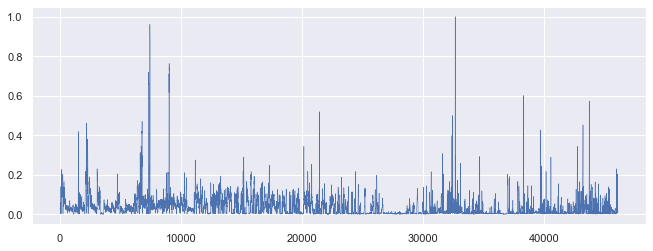

In [110]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
df1['windowDuration'].plot(linewidth=0.5);

In [104]:
a=df1
a_train, a_test = train_test_split(a, test_size=0.30, random_state=0)
# a_train.to_csv('Normalized30_TRAIN',index=False)
# a_test.to_csv('Normalized30_TEST',index=False)
a_train.to_csv('Normalized_TRAIN_float',header=False,index=False)
a_test.to_csv('Normalized_TEST_float',header=False,index=False)

In [105]:
a_train.shape

(32263, 22)

In [79]:
a_train.activity.value_counts()

3    6513
0    6493
2    6477
4    6421
1    6359
Name: activity, dtype: int64

In [78]:
a_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32263 entries, 21251 to 2732
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   activity                  32263 non-null  object 
 1   lastSensorEventHours      32263 non-null  float64
 2   lastSensorEventSeconds    32263 non-null  float64
 3   lastSensorDayOfWeek       32263 non-null  float64
 4   windowDuration            32263 non-null  float64
 5   prevDominantSensor1       32263 non-null  float64
 6   prevDominantSensor2       32263 non-null  float64
 7   lastSensorID              32263 non-null  float64
 8   lastSensorLocation        32263 non-null  float64
 9   lastMotionLocation        32263 non-null  float64
 10  complexity                32263 non-null  float64
 11  sensorCount-Bedroom       32263 non-null  float64
 12  sensorCount-Ignore        32263 non-null  float64
 13  sensorCount-Kitchen       32263 non-null  float64
 14  sen

In [77]:
a_test.shape

(13827, 22)

In [7]:
for j in range(1,36):
       print(df.iloc[:, j].unique())

[4. 5. 6. 0. 1. 2. 3.]
[ 130.  131.  241. ... 5407. 2678. 2479.]
[0.000e+00 1.000e+00 1.130e+02 ... 2.835e+03 1.113e+03 6.520e+02]
[0. 5. 9. 7. 6. 1. 3.]
[0. 5. 9. 7. 6. 1. 3.]
[5. 9. 7. 3. 6. 1. 0.]
[5. 9. 7. 3. 6. 1. 0.]
[ 9.  7.  3.  6.  1.  0. -1.]
[0.94807824 0.97095059 0.98713777 ... 1.30431098 1.69429476 2.04214216]
[0.33076923 0.32824427 0.28215768 ... 0.894081   0.89968652 0.90595611]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
[0.]
[ 0.    1.    1.01 ...  6.48  6.96 14.58]
[ 0.    1.    1.01 ... 23.85 11.26 11.46]
[0.]
[0.   1.   1.01 ... 9.88 1.09 1.2 ]
[0.]
[21.79 21.98 21.87 ... 12.11  8.21 10.39]
[ 0.    1.    1.01 ... 20.5  25.28 24.15]
[ 0.    1.    2.01 ...  8.17 11.77 26.63]
[0.]
[12.56 12.37 12.48 ... 16.24 12.8   5.33]
[0.]
[8.64000000e+04 0.00000000e+00 5.43638000e+00 ... 6.00399032e+02
 6.03001703e+02 6.04158945e+02]
[8.64000000e+04 0.00000000e+00 3.09515100e+00 ... 6.37973340e+01
 1.09896471e+02 6.68786000e-01]
[86400.]


In [8]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,36):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[]

In [ ]:
# # filling nan with mean in any columns

# for j in range(0,36):        
#         df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [ ]:
# another sanity check to make sure that there are not more any nan
df.isnull().sum()

In [6]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

In [27]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
# values = df.values
# load dataset
df = pd.read_csv('csh101.ann.features.csv', header=0, index_col=0)
df = df.drop(['activity'], axis=1)
values = df.values
# integer encode direction
encoder = LabelEncoder()
values[:,2] = encoder.fit_transform(values[:,2])
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())
# data = []
# reframed = pd.DataFrame(data, columns=[])


# ## full data without resampling
# #values = df.values

# # # integer encode direction
# # # ensure all data is float
# # #values = values.astype('float32')
# # # normalize features
# # scaler = MinMaxScaler(feature_range=(0, 1))
# # scaled = scaler.fit_transform(values)
# # # frame as supervised learning
# # reframed = series_to_supervised(scaled, 1, 1)

# # # drop columns we don't want to predict
# # reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
# # print(reframed.head())


# # ensure all data is float
# try:
# #     values = values.astype(np.float32)
#     # normalize features
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled = scaler.fit_transform(values)
#     # frame as supervised learning
#     reframed = series_to_supervised(scaled, 1, 1)
#     print(reframed.head())
# except:
#     pass 
# print (reframed)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.445190   0.666667   0.016694   0.000000        0.0        0.0   
2   0.445202   0.666667   0.016831   0.000082        0.0        0.0   
3   0.446510   0.666667   0.031883   0.009275        0.0        0.0   
4   0.446556   0.666667   0.032293   0.000328        0.0        0.0   
5   0.446556   0.666667   0.032157   0.000000        0.0        0.0   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var26(t)  var27(t)  \
1   0.555556   0.555556        1.0    0.351279  ...       1.0       0.0   
2   1.000000   1.000000        1.0    0.351279  ...       1.0       0.0   
3   0.555556   0.555556        1.0    0.351279  ...       1.0       0.0   
4   0.555556   0.555556        1.0    0.351279  ...       1.0       0.0   
5   1.000000   1.000000        1.0    0.359754  ...       1.0       0.0   

   var28(t)  var29(t)  var30(t)  var31(t)  var32(t)  var33(t)  var34(t)  \
1       1.0       0.0  0.000003       1.0      

In [29]:
# split into train and test sets
values = reframed.values
print (values)

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

[[0.44519034 0.66666667 0.01669403 ... 0.         0.         0.        ]
 [0.44520191 0.66666667 0.01683087 ... 0.         0.00272483 0.        ]
 [0.4465098  0.66666667 0.03188287 ... 0.         0.00282748 0.        ]
 ...
 [0.99526615 0.         0.01888342 ... 0.         0.03567613 0.        ]
 [0.9952893  0.         0.01902025 ... 0.         0.03573865 0.        ]
 [0.99531245 0.         0.01915709 ... 0.         0.03576645 0.        ]]
(8760, 1, 69) (8760,) (312667, 1, 69) (312667,)


In [33]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
sgd = optimizers.SGD(lr=0.001, nesterov=True)
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics =['accuracy'])

#    model = Sequential()
#    model.add(Dense(64, kernel_initializer='uniform', input_shape=(10,)))
#    model.add(Activation('softmax'))

#    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#    model.compile(loss='mean_squared_error', optimizer=sgd)



# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=1000, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 8760 samples, validate on 312667 samples
Epoch 1/100
 - 3s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 5.0218e-04 - val_accuracy: 1.0000
Epoch 2/100
 - 2s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 5.0821e-04 - val_accuracy: 1.0000
Epoch 3/100
 - 2s - loss: 9.7417e-04 - accuracy: 1.0000 - val_loss: 1.5579e-04 - val_accuracy: 1.0000
Epoch 4/100
 - 2s - loss: 6.2751e-04 - accuracy: 1.0000 - val_loss: 9.2879e-05 - val_accuracy: 1.0000
Epoch 5/100
 - 2s - loss: 4.8804e-04 - accuracy: 1.0000 - val_loss: 5.4781e-05 - val_accuracy: 1.0000
Epoch 6/100
 - 1s - loss: 4.1410e-04 - accuracy: 1.0000 - val_loss: 4.9062e-05 - val_accuracy: 1.0000
Epoch 7/100
 - 2s - loss: 3.6940e-04 - accuracy: 1.0000 - val_loss: 3.8454e-05 - val_accuracy: 1.0000
Epoch 8/100
 - 2s - loss: 3.2225e-04 - accuracy: 1.0000 - val_loss: 3.2613e-05 - val_accuracy: 1.0000
Epoch 9/100
 - 2s - loss: 3.0306e-04 - accuracy: 1.0000 - val_loss: 2.5051e-05 - val_accuracy: 1.0000
Epoch 10/100
 - 2s - loss: 2.6793e-04 - 

Epoch 81/100
 - 3s - loss: 2.8332e-05 - accuracy: 1.0000 - val_loss: 3.4226e-06 - val_accuracy: 1.0000
Epoch 82/100
 - 2s - loss: 2.6034e-05 - accuracy: 1.0000 - val_loss: 3.4112e-06 - val_accuracy: 1.0000
Epoch 83/100
 - 2s - loss: 2.5692e-05 - accuracy: 1.0000 - val_loss: 3.5687e-06 - val_accuracy: 1.0000
Epoch 84/100
 - 2s - loss: 2.6474e-05 - accuracy: 1.0000 - val_loss: 3.5155e-06 - val_accuracy: 1.0000
Epoch 85/100
 - 2s - loss: 2.6244e-05 - accuracy: 1.0000 - val_loss: 3.5607e-06 - val_accuracy: 1.0000
Epoch 86/100
 - 2s - loss: 2.4760e-05 - accuracy: 1.0000 - val_loss: 3.4891e-06 - val_accuracy: 1.0000
Epoch 87/100
 - 2s - loss: 2.4111e-05 - accuracy: 1.0000 - val_loss: 3.5687e-06 - val_accuracy: 1.0000
Epoch 88/100
 - 2s - loss: 2.4488e-05 - accuracy: 1.0000 - val_loss: 3.7718e-06 - val_accuracy: 1.0000
Epoch 89/100
 - 2s - loss: 2.4332e-05 - accuracy: 1.0000 - val_loss: 3.5324e-06 - val_accuracy: 1.0000
Epoch 90/100
 - 2s - loss: 2.4421e-05 - accuracy: 1.0000 - val_loss: 3.55

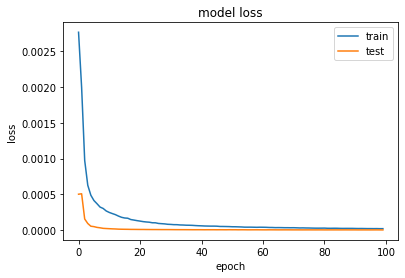

In [34]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [32]:
yhat = model.predict(test_X)
print(test_X.shape, test_X.shape[0])
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(312667, 1, 69) 312667


ValueError: cannot reshape array of size 21574023 into shape (312667,7)

In [ ]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours. 

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()